In [1]:
# Import packages
import itertools
import numpy as np
import pandas as pd
from datetime import datetime
# Import my packages
import sys
import os
path_to_package = os.path.abspath(
    os.path.join('..')
)
sys.path.append(path_to_package)
from download_data import StockUniverse
# Import statistical packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from statsmodels.stats.gof import powerdiscrepancy
# Visualization
import matplotlib.pyplot as plt

In [2]:
# Read pre-made pickle file
sp500_stock = StockUniverse()
sp500_stock.read_pickle(f'../data/tickers_{datetime.today().strftime("%Y-%m-%d")}.pkl')
sp500_stock.calc_normalized_returns(indicator_select=['O'])
sp500_stock.preprocess_returns_df()
sp500_stock.clean_df

Dropping tickers: [('Open', 'BF.B') ('Open', 'BRK.B') ('Open', 'CARR') ('Open', 'CTVA')
 ('Open', 'DOW') ('Open', 'FOX') ('Open', 'FOXA') ('Open', 'HWM')
 ('Open', 'NLOK') ('Open', 'OTIS') ('Open', 'VIAC')].
More than 25.00% missing!

Dropping tickers: [('Open', 'IR')].
Started trading after 2017-01-04!

Preprocessing done. Count of nulls after cleaning: 0


Open                                                    \
                   A       AAL       AAP      AAPL      ABBV       ABC   
Date                                                                     
2017-01-04  0.021772 -0.013748 -0.002401  0.000432 -0.004450  0.052095   
2017-01-05  0.002557 -0.002359  0.002935  0.000604  0.011814  0.021550   
2017-01-06 -0.008927 -0.014402  0.002634  0.007419  0.007889 -0.010073   
2017-01-09  0.029595  0.003490 -0.007355  0.010019 -0.001252  0.012810   
2017-01-10  0.006874  0.021517 -0.007997  0.006952  0.003919  0.005910   
...              ...       ...       ...       ...       ...       ...   
2020-10-16  0.017771  0.007365  0.016389  0.021563  0.005620  0.017469   
2020-10-19  0.007834  0.026807 -0.008951 -0.010884  0.008150 -0.000703   
2020-10-20 -0.008335  0.008703 -0.009160 -0.031344 -0.027717 -0.013664   
2020-10-21  0.000283 -0.004706  0.008469  0.004045 -0.007246 -0.004278   
2020-10-22 -0.005665 -0.007092 -0.013783  0.006686 -0.006700  0.001535   

                                                    ...                      \
                ABMD       ABT       ACN      ADBE  ...      XLNX       XOM   
Date                                                ...                       
2017-01-04  0.004087  0.011131 -0.004004  0.002997  ... -0.024061  0.001979   
2017-01-05  0.025482  0.004608  0.000599  0.003759  ... -0.007430 -0.010206   
2017-01-06 -0.007334  0.011723 -0.017012  0.017766  ... -0.011228 -0.015523   
2017-01-09  0.004954  0.027456  0.010001  0.018683  ...  0.013765 -0.006420   
2017-01-10 -0.027158  0.000490 -0.010332  0.005650  ...  0.002037 -0.011902   
...              ...       ...       ...       ...  ...       ...       ...   
2020-10-16  0.030863  0.007955  0.015249  0.009494  ...  0.021816  0.019881   
2020-10-19  0.014105  0.020427  0.005239  0.007440  ... -0.004219 -0.007856   
2020-10-20 -0.014709 -0.014104 -0.015332 -0.024618  ... -0.016186 -0.012903   
2020-10-21 -0.019658 -0.003138  0.014116 -0.006461  ... -0.009906 -0.004456   
2020-10-22 -0.017028 -0.014721  0.013919  0.009491  ... -0.016791 -0.009848   

                                                                        \
                XRAY       XRX       XYL       YUM       ZBH      ZBRA   
Date                                                                     
2017-01-04  0.010858  0.078101 -0.004805 -0.006451  0.000096 -0.009587   
2017-01-05  0.005968  0.017045  0.009455  0.003167  0.006739  0.009096   
2017-01-06 -0.011186 -0.002793 -0.003388  0.004736  0.005355 -0.017797   
2017-01-09 -0.002057 -0.009804 -0.009198  0.011469 -0.003519  0.008119   
2017-01-10  0.002576  0.005658 -0.004844  0.005903  0.054787  0.008987   
...              ...       ...       ...       ...       ...       ...   
2020-10-16  0.012667  0.017206  0.013233  0.038987  0.034610  0.034168   
2020-10-19  0.006803  0.004478 -0.000768 -0.012842 -0.009038  0.007725   
2020-10-20 -0.016783 -0.011392  0.001647 -0.005285 -0.024229  0.003559   
2020-10-21 -0.008867 -0.019038  0.003070 -0.005926 -0.014926  0.006991   
2020-10-22  0.051219  0.000000 -0.003826  0.024360  0.009417 -0.005046   

                                
                ZION       ZTS  
Date                            
2017-01-04 -0.006630 -0.002970  
2017-01-05  0.010817  0.007818  
2017-01-06 -0.014117 -0.005357  
2017-01-09 -0.004157  0.004457  
2017-01-10  0.000000 -0.001109  
...              ...       ...  
2020-10-16  0.042575  0.011910  
2020-10-19  0.008360  0.003903  
2020-10-20  0.007015 -0.026364  
2020-10-21 -0.039582 -0.004866  
2020-10-22 -0.002638  0.011724  

[961 rows x 493 columns]

In [3]:
sp500_oreturns = sp500_stock.clean_df['Open']
# Scale
scaler = StandardScaler()
_ = scaler.fit_transform(sp500_oreturns)

In [4]:
class PairSelector:
    def __init__(
        self,
        scaler=StandardScaler(),
        pca_model=PCA(n_components=15), 
        cluster_model=OPTICS()
    ):  
        """Init the class by storing the model objects
        :param pca_model
        :param cluster_model
        :return None
        """
        
        self.pca_model = pca_model
        self.cluster_model = cluster_model
        return None
    
    def fit(self, stockuniverse):
        """Fit the model
        
        :param df: the cleaned dataframe of returns
        """
        self.stockuniverse = stockuniverse
        self.scaled_df = scaler.fit_transform(stockuniverse.clean_df)
        self.pca_model.fit(self.scaled_df)
        self.reduced_df = self.pca_model.components_.T
        self.cluster_model.fit(self.reduced_df)
        # Get unique_labels
        self.unique_labels = np.unique(self.cluster_model.labels_)
    
    def visualize_clusters(self):
        # Init
        fig, ax = plt.subplots(
            figsize=(15,10), 
            subplot_kw={'projection': '3d'}
        )
        # Loop through each label to visualize
        for each_label in self.unique_labels:
            label_mask = (self.cluster_model.labels_ == each_label)
            filtered_reduced_df = self.reduced_df[label_mask]
            ax.scatter(
                xs=filtered_reduced_df[:, 0], 
                ys=filtered_reduced_df[:, 1], 
                zs=filtered_reduced_df[:, 2],
                label=f'Label #{each_label}'
            )
        plt.legend()
        plt.show()
    
    def generate_pairs(self):
        """
        Generate ticker-name pairs
        :return self.pairs: a list of ticker-name pairs
        """
        print(f'Generating pairs...')
        # Get unique_labels
        self.unique_labels = np.unique(self.cluster_model.labels_)
        # Loop through each label to generate pair
        self.pairs = []
        for each_label in self.unique_labels:
            print(f'Working on label #{each_label}...')
            # Select the tickers that have this label
            label_mask = (self.cluster_model.labels_ == each_label)
            # Get those selected tickers
            labeled_tickers = self.stockuniverse.clean_df.columns[label_mask]
            for pair in itertools.combinations(labeled_tickers, 2):
                self.pairs.append(list(pair))
            print(f'Done. Found {len(labeled_tickers)} tickers. Currently has {len(self.pairs)} pairs.\n')
        return self.pairs

    def test_cointegration(self, each_pair):
        """
        :param pair: ticker names
        :return None
        """
        # 1. Same order
        print(each_pair)
        cleaned_df = self.stockuniverse.prices_df[each_pair]
        
        # 2. Reverse order
        reversed_pair = each_pair[::-1]
        print(reversed_pair)
        cleaned_df = self.stockuniverse.prices_df[reversed_pair]
        return None

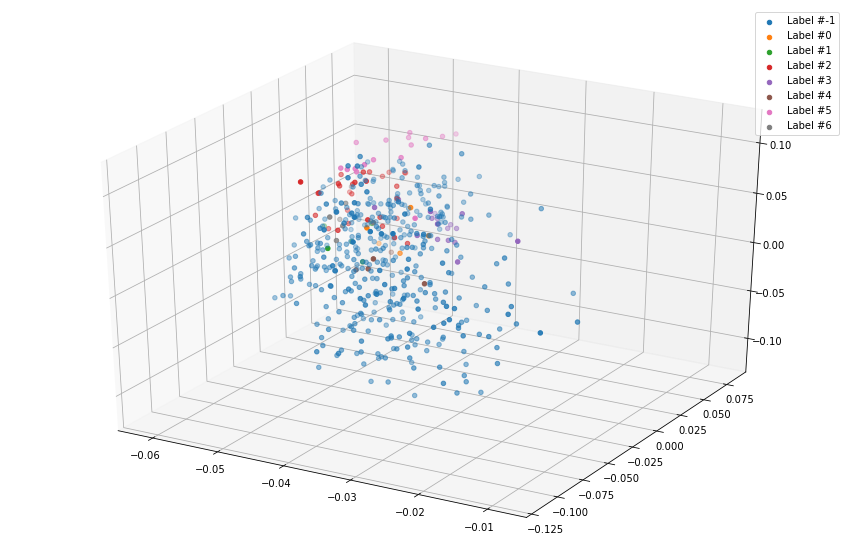

In [8]:
# DONE: SECTION A and B
selector = PairSelector()
selector.fit(sp500_stock)
selector.visualize_clusters()

In [6]:
# TODO: SECTION C
selector.generate_pairs
selector.test_cointegration(
    selector.pairs[0]
)

Open           
                     A        AAL
Date                             
2017-01-02         NaN        NaN
2017-01-03   45.930000  47.279999
2017-01-04   46.930000  46.630001
2017-01-05   47.049999  46.520000
2017-01-06   46.630001  45.849998
...                ...        ...
2020-10-16  105.949997  12.310000
2020-10-19  106.779999  12.640000
2020-10-20  105.889999  12.750000
2020-10-21  105.919998  12.690000
2020-10-22  105.320000  12.600000

[963 rows x 2 columns]